In [82]:
%matplotlib inline

import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

plt.style.use('bmh')

In [84]:
sf_pop = {'2019': 881549, '2018': 883305, '2017': 884363, '2016': 883305, '2015': 864816, 
          '2014': 852469,'2013': 837442, '2012': 825865, '2011': 812826, '2010': 805463, 
          '2009': 774347,'2008': 767067, '2007': 758348, '2006': 751431, '2005': 748846, 
          '2004': 750133,'2003': 757638, '2002': 755862, '2001': 777613, '2000': 777340}
year=[]
pop=[]
for key, val in sf_pop.items():
    year.append(int(key))
    pop.append(int(val))
d={'year': year, 'pop': pop}
sf_pop_df = pd.DataFrame(d).sort_values('year')
sf_pop_df

,year,pop
19,2000,777340
18,2001,777613
17,2002,755862
16,2003,757638
15,2004,750133
14,2005,748846
13,2006,751431
12,2007,758348
11,2008,767067
10,2009,774347


# Police Incident Reports
**Two reports: from 2003 - 2018 & 2018 - Present**

Step 1: Find relevant information & combine

In [3]:
police_incidents = pd.read_csv('DataSets/Stadium Impact/Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv')


In [69]:
police_incidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215024 entries, 0 to 2215023
Data columns (total 36 columns):
IncidntNum                                              int64
Category                                                object
Descript                                                object
DayOfWeek                                               object
Date                                                    object
Time                                                    object
PdDistrict                                              object
Resolution                                              object
Address                                                 object
X                                                       float64
Y                                                       float64
Location                                                object
PdId                                                    int64
SF Find Neighborhoods                                   float64
Curr

In [28]:
police_incidents.fillna(0)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,...,Fix It Zones as of 2017-11-06,DELETE - HSOC Zones,Fix It Zones as of 2018-02-07,"CBD, BID and GBD Boundaries as of 2017","Areas of Vulnerability, 2016",Central Market/Tenderloin Boundary,Central Market/Tenderloin Boundary Polygon - Updated,HSOC Zones as of 2018-06-05,OWED Public Spaces,Lat_Long
0,110308742,MISSING PERSON,FOUND PERSON,Friday,04/15/2011,16:00,TARAVAL,LOCATED,0 Block of CRESPI DR,-122.476328,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,"[37.7196874952717, -122.476327815126]"
1,90316914,WARRANTS,WARRANT ARREST,Thursday,03/26/2009,12:28,SOUTHERN,"ARREST, BOOKED",1000 Block of MARKET ST,-122.411340,...,0.0,1.0,0.0,7.0,2.0,1.0,1.0,1.0,35.0,"[37.7812707434494, -122.41133956255699]"
2,130132311,SECONDARY CODES,DOMESTIC VIOLENCE,Friday,02/15/2013,02:00,PARK,"ARREST, BOOKED",CASTRO ST / MARKET ST,-122.435188,...,1.0,5.0,1.0,9.0,1.0,0.0,0.0,5.0,0.0,"[37.7626702770872, -122.435187699349]"
3,80052833,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Tuesday,01/15/2008,20:13,MISSION,"ARREST, CITED",VALENCIA ST / 16TH ST,-122.421886,...,0.0,3.0,0.0,0.0,2.0,0.0,0.0,3.0,0.0,"[37.7649178909424, -122.421886357981]"
4,70535770,SECONDARY CODES,DOMESTIC VIOLENCE,Saturday,05/26/2007,18:10,MISSION,"ARREST, BOOKED",2800 Block of FOLSOM ST,-122.413935,...,0.0,3.0,0.0,0.0,2.0,0.0,0.0,3.0,0.0,"[37.7516932889916, -122.413935404044]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2215019,61082136,MISSING PERSON,FOUND PERSON,Monday,10/09/2006,19:30,SOUTHERN,LOCATED,0 Block of COLUMBIASQUARE ST,-122.405602,...,6.0,0.0,6.0,0.0,2.0,0.0,0.0,0.0,0.0,"[37.7772651164878, -122.40560225745199]"
2215020,130355795,VEHICLE THEFT,STOLEN TRUCK,Tuesday,04/30/2013,23:30,MISSION,NONE,200 Block of BARTLETT ST,-122.419699,...,0.0,3.0,0.0,0.0,2.0,0.0,0.0,3.0,0.0,"[37.752951196703, -122.41969897961599]"
2215021,30118617,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Wednesday,01/29/2003,13:20,BAYVIEW,"ARREST, CITED",BAY SHORE BL / BACON ST,-122.402210,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,"[37.728104222397704, -122.402210107743]"
2215022,40194839,LARCENY/THEFT,GRAND THEFT FROM A BUILDING,Friday,02/13/2004,16:00,CENTRAL,NONE,500 Block of WASHINGTON ST,-122.402219,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,"[37.795712820350204, -122.402218963687]"


In [20]:
police_incidents.columns

Index(['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time',
       'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location', 'PdId',
       'SF Find Neighborhoods', 'Current Police Districts',
       'Current Supervisor Districts', 'Analysis Neighborhoods',
       'DELETE - Fire Prevention Districts', 'DELETE - Police Districts',
       'DELETE - Supervisor Districts', 'DELETE - Zip Codes',
       'DELETE - Neighborhoods', 'DELETE - 2017 Fix It Zones',
       'Civic Center Harm Reduction Project Boundary',
       'Fix It Zones as of 2017-11-06 ', 'DELETE - HSOC Zones',
       'Fix It Zones as of 2018-02-07',
       'CBD, BID and GBD Boundaries as of 2017',
       'Areas of Vulnerability, 2016', 'Central Market/Tenderloin Boundary',
       'Central Market/Tenderloin Boundary Polygon - Updated',
       'HSOC Zones as of 2018-06-05', 'OWED Public Spaces'],
      dtype='object')

In [21]:
police_incidents['Date']=pd.to_datetime(police_incidents['Date'])
police_incidents['Month'] = police_incidents['Date'].transform(lambda x: x.month)
police_incidents['Year'] = police_incidents['Date'].transform(lambda x: x.year)
police_incidents = police_incidents.sort_values('Date')

In [121]:
police_incidents[['X', 'Y']]

,X,Y
1906666,-122.445087,37.773156
2019213,-122.407808,37.763099
1896054,-122.454020,37.719106
2004214,-122.437299,37.761894
1788056,-122.397817,37.784668
...,...,...
962273,-122.447761,37.769846
962308,-122.410042,37.781954
961966,-122.447761,37.769846
961723,-122.417813,37.757101


In [23]:
zipcodes = pd.read_csv('DataSets/SF_Population/ziplatlong.csv', sep=';')
zipcodes[['Latitude','Longitude']].iloc[0,0]
zipcodes.head()

,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
0,94175,San Francisco,CA,37.784827,-122.727802,-8,1,"37.784827,-122.727802"
1,94160,San Francisco,CA,37.784827,-122.727802,-8,1,"37.784827,-122.727802"
2,94164,San Francisco,CA,37.784827,-122.727802,-8,1,"37.784827,-122.727802"
3,94131,San Francisco,CA,37.741797,-122.437800,-8,1,"37.741797,-122.4378"
4,94114,San Francisco,CA,37.758434,-122.435120,-8,1,"37.758434,-122.43512"


In [73]:
police_incidents['Xstr']=police_incidents['X'].transform(lambda x: str(x))
police_incidents['Ystr']=police_incidents['Y'].transform(lambda x: str(x))
police_incidents['indxStr']=police_incidents['Xstr']+police_incidents['Ystr']

In [33]:
addresses = police_incidents.groupby(['Address','X', 'Y']).count()['Date'].reset_index()
addresses['Lat_Long'] = addresses[['Y', 'X']].values.tolist()
addresses.isna().sum()

Address     0
X           0
Y           0
Date        0
Lat_Long    0
dtype: int64

In [24]:
from geopy.distance import geodesic
test=[37.7196874952717, -122.476327815126]

def closest_pt(row):
    distances=[]
    zips=zipcodes[['Latitude','Longitude']]
    for elem in range(len(zipcodes.index)):
        dist = geodesic((row[0],row[1]), (zips.iloc[elem,0],zips.iloc[elem,1]))
        distances.append(dist)
    return zipcodes.iloc[np.argmin(distances),0]

closest_pt(test)

94132

In [34]:
addresses['Zipcode'] = addresses['Lat_Long'].apply(closest_pt)

In [63]:
addresses['indx']=addresses['X']+addresses['Y']

In [124]:
addresses['Xstr']=addresses['X'].transform(lambda x: str(x))
addresses['Ystr']=addresses['Y'].transform(lambda x: str(x))
addresses['indxStr']=addresses['Xstr']+addresses['Ystr']
add = addresses[['Zipcode','indxStr']]
add.to_csv('2003_2018_zips')

In [78]:
pol13_18w = pd.merge(police_incidents,add,on='indxStr')

In [80]:
pol13_18 = pol13_18w.drop(columns=['Lat_Long','Lat_Long2','Xstr','Ystr','indxStr'])


,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,...,DELETE - HSOC Zones,Fix It Zones as of 2018-02-07,"CBD, BID and GBD Boundaries as of 2017","Areas of Vulnerability, 2016",Central Market/Tenderloin Boundary,Central Market/Tenderloin Boundary Polygon - Updated,HSOC Zones as of 2018-06-05,OWED Public Spaces,indx,Zipcode
0,110308742,MISSING PERSON,FOUND PERSON,Friday,04/15/2011,16:00,TARAVAL,LOCATED,0 Block of CRESPI DR,-122.476328,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,-84.756640,94132
1,136187192,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Friday,10/04/2013,00:01,TARAVAL,NONE,0 Block of CRESPI DR,-122.476328,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,-84.756640,94132
2,120160344,MISSING PERSON,MISSING JUVENILE,Saturday,02/25/2012,10:00,TARAVAL,LOCATED,0 Block of CRESPI DR,-122.476328,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,-84.756640,94132
3,50483274,LARCENY/THEFT,ATTEMPTED THEFT FROM A BUILDING,Sunday,05/01/2005,03:00,TARAVAL,NONE,0 Block of CRESPI DR,-122.476328,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,-84.756640,94132
4,131051047,VANDALISM,"MALICIOUS MISCHIEF, BREAKING WINDOWS",Saturday,12/14/2013,00:01,TARAVAL,NONE,0 Block of CRESPI DR,-122.476328,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,-84.756640,94132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3392145,51240140,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,11/02/2005,12:30,CENTRAL,NONE,CUSHMAN ST / SACRAMENTO ST,-122.411905,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,-84.619256,94108
3392146,30298827,NON-CRIMINAL,"AIDED CASE, DOG BITE",Saturday,02/22/2003,12:00,PARK,NONE,DAWNVIEW WY / GLENVIEW DR,-122.447642,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,-84.699571,94131
3392147,40357645,OTHER OFFENSES,TRAFFIC VIOLATION,Sunday,03/28/2004,16:57,NORTHERN,"ARREST, CITED",CHURCH ST / RESERVOIR ST,-122.429057,...,5.0,20.0,9.0,1.0,NaN,NaN,5.0,NaN,-84.660383,94117
3392148,30736899,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,Wednesday,06/18/2003,20:15,RICHMOND,NONE,EL CAMINO DEL MAR / 26TH AV,-122.486357,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,-84.698797,94121


In [81]:
# pol13_18.to_csv('Polic1318.csv')
pol13_18 = pd.read_csv('Polic1318.csv')

In [101]:
zipcodes_of_interest = ['94107','94103', '94158', '94105']
cat_of_interest = ['OTHER OFFENSES', 'NON-CRIMINAL','LARCENY/THEFT','SECONDARY CODES', 'ROBBERY',
                         'SUSPICIOUS OCC','DRUG/NARCOTIC', 'VANDALISM','DISORDERLY CONDUCT', 'DRUNKENNESS', 
                         'LIQUOR LAWS','DRIVING UNDER THE INFLUENCE','LOITERING', 'TRESPASS', 'SUICIDE']

In [87]:
pol13_18[pol13_18['Zipcode'].isin(zipcodes_of_interest)]['Category'].unique()

array(['OTHER OFFENSES', 'NON-CRIMINAL', 'WEAPON LAWS', 'WARRANTS',
       'LARCENY/THEFT', 'SECONDARY CODES', 'ROBBERY', 'ASSAULT',
       'SUSPICIOUS OCC', 'DRUG/NARCOTIC', 'FRAUD', 'VANDALISM',
       'MISSING PERSON', 'VEHICLE THEFT', 'KIDNAPPING',
       'DISORDERLY CONDUCT', 'DRUNKENNESS', 'LIQUOR LAWS',
       'DRIVING UNDER THE INFLUENCE', 'RECOVERED VEHICLE',
       'SEX OFFENSES, FORCIBLE', 'STOLEN PROPERTY', 'BAD CHECKS',
       'FORGERY/COUNTERFEITING', 'LOITERING', 'ARSON', 'EMBEZZLEMENT',
       'BURGLARY', 'PROSTITUTION', 'SEX OFFENSES, NON FORCIBLE',
       'TRESPASS', 'SUICIDE', 'RUNAWAY', 'FAMILY OFFENSES', 'EXTORTION',
       'BRIBERY', 'GAMBLING', 'PORNOGRAPHY/OBSCENE MAT', 'TREA'],
      dtype=object)

In [88]:
import calendar
pol13_18['Date'] = pd.to_datetime(pol13_18['Date'])
pol13_18['Month'] = pol13_18['Date'].transform(lambda x: x.month)
pol13_18['Month-Year'] = pol13_18['Date'].transform(lambda x: f'{calendar.month_abbr[x.month]} {x.year}')
pol13_18['Year'] = pol13_18['Date'].transform(lambda x: x.year)
pol13_18.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,DELETE - Fire Prevention Districts,DELETE - Police Districts,DELETE - Supervisor Districts,DELETE - Zip Codes,DELETE - Neighborhoods,DELETE - 2017 Fix It Zones,Civic Center Harm Reduction Project Boundary,Fix It Zones as of 2017-11-06,DELETE - HSOC Zones,Fix It Zones as of 2018-02-07,"CBD, BID and GBD Boundaries as of 2017","Areas of Vulnerability, 2016",Central Market/Tenderloin Boundary,Central Market/Tenderloin Boundary Polygon - Updated,HSOC Zones as of 2018-06-05,OWED Public Spaces,indx,Zipcode,Month,Month-Year,Year
0,110308742,MISSING PERSON,FOUND PERSON,Friday,2011-04-15,16:00,TARAVAL,LOCATED,0 Block of CRESPI DR,-122.476328,37.719687,POINT (-122.476327815126 37.7196874952717),11030874275000,42.0,10.0,8.0,16.0,1.0,8.0,4.0,64.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,-84.75664,94132,4,Apr 2011,2011
1,136187192,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Friday,2013-10-04,00:01,TARAVAL,NONE,0 Block of CRESPI DR,-122.476328,37.719687,POINT (-122.476327815126 37.7196874952717),13618719206372,42.0,10.0,8.0,16.0,1.0,8.0,4.0,64.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,-84.75664,94132,10,Oct 2013,2013
2,120160344,MISSING PERSON,MISSING JUVENILE,Saturday,2012-02-25,10:00,TARAVAL,LOCATED,0 Block of CRESPI DR,-122.476328,37.719687,POINT (-122.476327815126 37.7196874952717),12016034474010,42.0,10.0,8.0,16.0,1.0,8.0,4.0,64.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,-84.75664,94132,2,Feb 2012,2012
3,50483274,LARCENY/THEFT,ATTEMPTED THEFT FROM A BUILDING,Sunday,2005-05-01,03:00,TARAVAL,NONE,0 Block of CRESPI DR,-122.476328,37.719687,POINT (-122.476327815126 37.7196874952717),5048327406300,42.0,10.0,8.0,16.0,1.0,8.0,4.0,64.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,-84.75664,94132,5,May 2005,2005
4,131051047,VANDALISM,"MALICIOUS MISCHIEF, BREAKING WINDOWS",Saturday,2013-12-14,00:01,TARAVAL,NONE,0 Block of CRESPI DR,-122.476328,37.719687,POINT (-122.476327815126 37.7196874952717),13105104728100,42.0,10.0,8.0,16.0,1.0,8.0,4.0,64.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,-84.75664,94132,12,Dec 2013,2013


In [116]:
mbdppol = pol13_18[['Category','Descript','Date','Month','Month-Year','Year','Time','Zipcode','PdDistrict','X','Y','Analysis Neighborhoods']][(pol13_18['Zipcode'].isin(zipcodes_of_interest))&(pol13_18['Category'].isin(cat_of_interest))]
mbdppol = mbdppol.sort_values('Date')
years = mbdppol['Year'].unique()

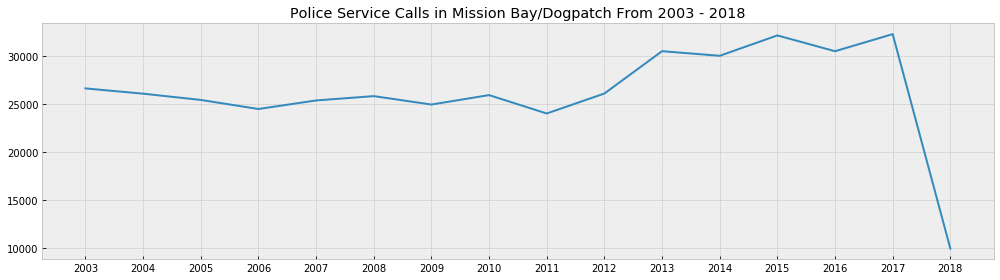

In [112]:
#Absolute Values
fig, ax = plt.subplots(figsize=(14,4))
ax.plot(years, mbdppol.groupby('Year').count()['Date'])
ax.set_xticks(years)
ax.set_title('Police Service Calls in Mission Bay/Dogpatch From 2003 - 2018')
plt.savefig('Total_Police_Calls_2003-2018.png', dpi=300)
plt.tight_layout()
plt.show()

In [114]:
mbdp_pol_annual = mbdppol.groupby(['Year']).count()
mbdp_pol_annual = pd.merge(mbdp_pol_annual, sf_pop_df, left_on='Year', right_on='year')
mbdp_pol_annual['Normalized'] = mbdp_pol_annual['Date']/mbdp_pol_annual['pop']
mbdp_pol_annual.head(20)

,Category,Descript,Date,Month,Month-Year,Time,Zipcode,PdDistrict,X,Y,Analysis Neighborhoods,year,pop,Normalized
0,26636,26636,26636,26636,26636,26636,26636,26636,26636,26636,26630,2003,757638,0.035157
1,26085,26085,26085,26085,26085,26085,26085,26085,26085,26085,26081,2004,750133,0.034774
2,25434,25434,25434,25434,25434,25434,25434,25434,25434,25434,25433,2005,748846,0.033964
3,24487,24487,24487,24487,24487,24487,24487,24487,24487,24487,24485,2006,751431,0.032587
4,25378,25378,25378,25378,25378,25378,25378,25378,25378,25378,25378,2007,758348,0.033465
5,25831,25831,25831,25831,25831,25831,25831,25831,25831,25831,25831,2008,767067,0.033675
6,24952,24952,24952,24952,24952,24952,24952,24952,24952,24952,24952,2009,774347,0.032223
7,25937,25937,25937,25937,25937,25937,25937,25937,25937,25937,25936,2010,805463,0.032201
8,24018,24018,24018,24018,24018,24018,24018,24018,24018,24018,24018,2011,812826,0.029549
9,26102,26102,26102,26102,26102,26102,26102,26102,26102,26102,26099,2012,825865,0.031606


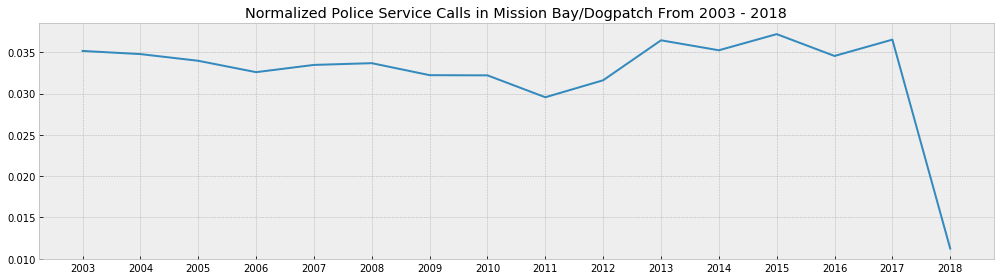

In [123]:
#Normalized Values
fig, ax = plt.subplots(figsize=(14,4))
ax.plot(years, mbdp_pol_annual['Normalized'])
ax.set_xticks(years)
ax.set_title('Normalized Police Service Calls in Mission Bay/Dogpatch From 2003 - 2018')
plt.savefig('Normalized_Police_Calls_2003-2018.png', dpi=300)
plt.tight_layout()
plt.show()

In [122]:
pol13_18[pol13_18['Zipcode'].isin(zipcodes_of_interest)].groupby(['Zipcode','X','Y']).count().tail(20)

IncidntNum  Category  Descript  DayOfWeek  \
Zipcode X           Y                                                      
94107   -122.385038 37.754289          30        30        30         30   
        -122.385025 37.754179          40        40        40         40   
                    37.754179           4         4         4          4   
        -122.385011 37.755629          36        36        36         36   
                    37.755629          12        12        12         12   
        -122.385000 37.755520          16        16        16         16   
                    37.755520         237       237       237        237   
        -122.384413 37.753084           7         7         7          7   
        -122.384403 37.752975         105       105       105        105   
                    37.752975          16        16        16         16   
        -122.384167 37.750526           4         4         4          4   
                    37.750526         142       142       142        142   
        -122.384157 37.750416         114       114       114        114   
                    37.750416          57        57        57         57   
        -122.383583 37.754375           3         3         3          3   
                    37.754375           3         3         3          3   
        -122.383572 37.754265           6         6         6          6   
        -122.382951 37.753114           1         1         1          1   
        -122.382483 37.753196           1         1         1          1   
                    37.753196           1         1         1          1   

                               Date  Time  PdDistrict  Resolution  Address  \
Zipcode X           Y                                                        
94107   -122.385038 37.754289    30    30          30          30       30   
        -122.385025 37.754179    40    40          40          40       40   
                    37.754179     4     4           4           4        4   
        -122.385011 37.755629    36    36          36          36       36   
                    37.755629    12    12          12          12       12   
        -122.385000 37.755520    16    16          16          16       16   
                    37.755520   237   237         237         237      237   
        -122.384413 37.753084     7     7           7           7        7   
        -122.384403 37.752975   105   105         105         105      105   
                    37.752975    16    16          16          16       16   
        -122.384167 37.750526     4     4           4           4        4   
                    37.750526   142   142         142         142      142   
        -122.384157 37.750416   114   114         114         114      114   
                    37.750416    57    57          57          57       57   
        -122.383583 37.754375     3     3           3           3        3   
                    37.754375     3     3           3           3        3   
        -122.383572 37.754265     6     6           6           6        6   
        -122.382951 37.753114     1     1           1           1        1   
        -122.382483 37.753196     1     1           1           1        1   
                    37.753196     1     1           1           1        1   

                               Location  PdId  SF Find Neighborhoods  \
Zipcode X           Y                                                  
94107   -122.385038 37.754289        30    30                     30   
        -122.385025 37.754179        40    40                     40   
                    37.754179         4     4                      4   
        -122.385011 37.755629        36    36                     36   
                    37.755629        12    12                     12   
        -122.385000 37.755520        16    16                     16   
                    37.755520       237   237                    

In [132]:
pol13_18.groupby(['Year','Month']).count()['Category'].tail(20)

Year  Month
2016  10       19484
      11       18375
      12       18635
2017  1        18741
      2        17413
      3        19646
      4        18805
      5        19322
      6        18490
      7        19026
      8        18753
      9        18519
      10       20037
      11       18316
      12       18473
2018  1        17868
      2        14694
      3        15601
      4        15084
      5         5313
Name: Category, dtype: int64

In [126]:
polpresent = pd.read_csv('police_present.csv')

In [129]:
polpresent = polpresent.drop(columns='Unnamed: 0')